In [1]:
import gym
import Gym_GridWorld
from Gym_GridWorld.envs.utils import RandomGridGenerator

# REINFORCE

In [40]:
import gym
import numpy as np

import argparse

import torch
import torch.optim as optim

from REINFORCE import REINFORCEAgent
from policies import MLPPolicy
from runner import Runner

# Parse hyperparameters from command line
parser = argparse.ArgumentParser(description='REINFORCE')
parser.add_argument('--gamma', type=float, default=0.99, 
                    help='discount factor (default: 0.99)')
parser.add_argument('--seed', type=int, default=543, 
                    help='random seed (default: 543)')
parser.add_argument('--render', type=bool, default=False, 
                    help='render the environment (default: False)')
parser.add_argument('--log-interval', type=int, default=10, 
                    help='interval between training status logs (default: 10)')
#args = parser.parse_args()
args = parser.parse_args('--gamma 0.99 --seed 543 --render True --log-interval 10'.split())  # in Notebook

# Create environment
env = gym.make('CartPole-v0')

# Set random seed
env.seed(args.seed)
torch.manual_seed(args.seed)    

        
def main():
    # Create a policy network
    policy = MLPPolicy()
    # Create an optimzer
    optimizer = optim.Adam(policy.parameters(), lr=1e-2)
    # Create an agent
    agent = REINFORCEAgent(policy, optimizer)
    # Create a Runner
    runner = Runner(agent, env, args.gamma)
    
    # Loggings
    log_epi_rewards = []
    
    for epi in range(1000):
        # Collect batch of data via runner
        data_batch = runner.run(300, 1)
        # Train agent over batch of data
        losses = agent.train(data_batch, normalize_r=True)
        
        epi_rewards = np.sum(data_batch[0]['rewards'])
        log_epi_rewards.append(epi_rewards)
        
        if epi == 0 or (epi + 1)%args.log_interval == 0:    
            log_str = '[Episode #{:3d}]: \n '\
                        '\t\tTotal loss: {:f}'\
                        '\t\tBatch episodic rewards: {:f}'
            print(log_str.format(epi + 1, losses['total_loss'].data[0], epi_rewards))
            
    np.save('./logs/REINFORCE_3', log_epi_rewards)
    
if __name__ == '__main__':
    main()

[Episode #  1]: 
 		Total loss: 0.544309		Batch episodic rewards: 12.000000
[Episode # 10]: 
 		Total loss: 0.236842		Batch episodic rewards: 9.000000
[Episode # 20]: 
 		Total loss: -0.535106		Batch episodic rewards: 12.000000
[Episode # 30]: 
 		Total loss: -2.852828		Batch episodic rewards: 9.000000
[Episode # 40]: 
 		Total loss: 1.080266		Batch episodic rewards: 11.000000
[Episode # 50]: 
 		Total loss: 1.035594		Batch episodic rewards: 29.000000
[Episode # 60]: 
 		Total loss: 2.183567		Batch episodic rewards: 75.000000
[Episode # 70]: 
 		Total loss: -3.177478		Batch episodic rewards: 63.000000
[Episode # 80]: 
 		Total loss: 0.993878		Batch episodic rewards: 135.000000
[Episode # 90]: 
 		Total loss: -1.441638		Batch episodic rewards: 47.000000
[Episode #100]: 
 		Total loss: 5.967941		Batch episodic rewards: 142.000000
[Episode #110]: 
 		Total loss: -5.435255		Batch episodic rewards: 200.000000
[Episode #120]: 
 		Total loss: -0.123699		Batch episodic rewards: 199.000000
[Epi

# Actor-Critic

In [43]:
import gym
import numpy as np

import argparse

import torch
import torch.optim as optim

from ActorCritic import ActorCriticAgent
from policies import MLPValuePolicy
from runner import Runner

# Parse hyperparameters from command line
parser = argparse.ArgumentParser(description='Actor-Critic')
parser.add_argument('--gamma', type=float, default=0.99, 
                    help='discount factor (default: 0.99)')
parser.add_argument('--seed', type=int, default=543, 
                    help='random seed (default: 543)')
parser.add_argument('--render', type=bool, default=False, 
                    help='render the environment (default: False)')
parser.add_argument('--log-interval', type=int, default=10, 
                    help='interval between training status logs (default: 10)')
#args = parser.parse_args()
args = parser.parse_args('--gamma 0.99 --seed 543 --render True --log-interval 10'.split())  # in Notebook

# Create environment
env = gym.make('CartPole-v0')

# Set random seed
env.seed(args.seed)
torch.manual_seed(args.seed)    

        
def main():
    # Create a policy network
    policy = MLPValuePolicy()
    # Create an optimzer
    optimizer = optim.Adam(policy.parameters(), lr=3e-2)
    # Create an agent
    agent = ActorCriticAgent(policy, optimizer)
    # Create a Runner
    runner = Runner(agent, env, args.gamma)
    
    # Loggings
    log_epi_rewards = []
    
    for epi in range(1000):
        # Collect batch of data via runner
        data_batch = runner.run(300, 1)
        # Train agent over batch of data
        losses = agent.train(data_batch, normalize_r=True)
        
        epi_rewards = np.sum(data_batch[0]['rewards'])
        log_epi_rewards.append(epi_rewards)        

        if epi == 0 or (epi + 1)%args.log_interval == 0:
            log_str = '[Episode #{:3d}]: \n '\
                        '\t\tTotal loss: {:f}'\
                        '\t\tBatch episodic rewards: {:f}'
            print(log_str.format(epi + 1, losses['total_loss'].data[0], epi_rewards))
            
    np.save('./logs/AC_3', log_epi_rewards)
    
if __name__ == '__main__':
    main()

[Episode #  1]: 
 		Total loss: 5.728110		Batch episodic rewards: 13.000000
[Episode # 10]: 
 		Total loss: 1.267938		Batch episodic rewards: 10.000000
[Episode # 20]: 
 		Total loss: 0.165668		Batch episodic rewards: 9.000000
[Episode # 30]: 
 		Total loss: 0.962518		Batch episodic rewards: 12.000000
[Episode # 40]: 
 		Total loss: 114.847397		Batch episodic rewards: 110.000000
[Episode # 50]: 
 		Total loss: 34.642334		Batch episodic rewards: 86.000000
[Episode # 60]: 
 		Total loss: 13.807370		Batch episodic rewards: 98.000000
[Episode # 70]: 
 		Total loss: 18.208549		Batch episodic rewards: 200.000000
[Episode # 80]: 
 		Total loss: 25.526546		Batch episodic rewards: 65.000000
[Episode # 90]: 
 		Total loss: 18.681656		Batch episodic rewards: 58.000000
[Episode #100]: 
 		Total loss: 78.446220		Batch episodic rewards: 177.000000
[Episode #110]: 
 		Total loss: 43.183044		Batch episodic rewards: 200.000000
[Episode #120]: 
 		Total loss: 65.056793		Batch episodic rewards: 200.00000

In [53]:
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline


class Visualizer(object):
    def __init__(self):
        self.REINFORCE = []
        self.REINFORCE_ori = []
        self.AC = []
        self.AC_ori = []
        
        self.fig, self.ax = plt.subplots(1, 1)
        
    def vis(self):
        REINFORCE = np.array(self.REINFORCE)[:, ::10]
        REINFORCE_ori = np.array(self.REINFORCE_ori)[:, ::10]
        AC = np.array(self.AC)[:, ::10]
        AC_ori = np.array(self.AC_ori)[:, ::10]
        
        
        num_epi = REINFORCE.shape[1]
        
        mu_REINFORCE = np.mean(REINFORCE, axis=0)
        sigma_REINFORCE = np.std(REINFORCE, axis=0)
        mu_REINFORCE_ori = np.mean(REINFORCE_ori, axis=0)
        sigma_REINFORCE_ori = np.std(REINFORCE_ori, axis=0)
        
        mu_AC = np.mean(AC, axis=0)
        sigma_AC = np.std(AC, axis=0)
        mu_AC_ori = np.mean(AC_ori, axis=0)
        sigma_AC_ori = np.std(AC_ori, axis=0)
        
        
        self.ax.plot(mu_REINFORCE, color='green', label='REINFORCE - My code')
        self.ax.fill_between(range(num_epi), mu_REINFORCE - 0.5*sigma_REINFORCE, mu_REINFORCE + 0.5*sigma_REINFORCE, 
                         facecolor='green', alpha=0.3)
        self.ax.fill_between(range(num_epi), mu_REINFORCE - sigma_REINFORCE, mu_REINFORCE + sigma_REINFORCE, 
                         facecolor='green', alpha=0.2)
        
        self.ax.plot(mu_REINFORCE_ori, color='blue', label='REINFORCE - Facebook')
        self.ax.fill_between(range(num_epi), mu_REINFORCE_ori - 0.5*sigma_REINFORCE_ori, mu_REINFORCE_ori + 0.5*sigma_REINFORCE_ori, 
                         facecolor='blue', alpha=0.3)
        self.ax.fill_between(range(num_epi), mu_REINFORCE_ori - sigma_REINFORCE_ori, mu_REINFORCE_ori + sigma_REINFORCE_ori, 
                         facecolor='blue', alpha=0.2)
        
        
        self.ax.plot(mu_AC, color='orange', label='Actor Critic - My code')
        self.ax.fill_between(range(num_epi), mu_AC - 0.5*sigma_AC, mu_AC + 0.5*sigma_AC, 
                             facecolor='orange', alpha=0.3)
        self.ax.fill_between(range(num_epi), mu_AC - 1*sigma_AC, mu_AC + 1*sigma_AC, 
                             facecolor='orange', alpha=0.2)
        
        self.ax.plot(mu_AC_ori, color='red', label='Actor Critic - Facebook')
        self.ax.fill_between(range(num_epi), mu_AC_ori - 0.5*sigma_AC_ori, mu_AC_ori + 0.5*sigma_AC_ori, 
                             facecolor='red', alpha=0.3)
        self.ax.fill_between(range(num_epi), mu_AC_ori - 1*sigma_AC_ori, mu_AC_ori + 1*sigma_AC_ori, 
                             facecolor='red', alpha=0.2)
        
        
        self.ax.legend()
        
        self.ax.set_title('Performance in CartPole-v0')
        self.ax.set_xlabel('Number of episodes')
        self.ax.set_ylabel('Episodic rewards')
        
        return self.fig
        

/home/zuo/anaconda3/envs/RL/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


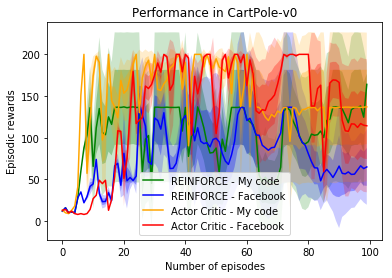

In [54]:
vis = Visualizer()
for i in range(3):
    vis.REINFORCE.append(np.load('logs/REINFORCE_{:d}.npy'.format(i+1)))
    vis.REINFORCE_ori.append(np.load('logs/REINFORCE_ori_{:d}.npy'.format(i+1)))
    vis.AC.append(np.load('logs/AC_{:d}.npy'.format(i+1)))
    vis.AC_ori.append(np.load('logs/AC_ori_{:d}.npy'.format(i+1)))
    
fig = vis.vis()
fig.show()

fig.savefig('logs/tmp.png')

In [64]:
import argparse
import gym
import numpy as np
from itertools import count
from collections import namedtuple

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.distributions import Categorical


parser = argparse.ArgumentParser(description='PyTorch actor-critic example')
parser.add_argument('--gamma', type=float, default=0.99, metavar='G',
                    help='discount factor (default: 0.99)')
parser.add_argument('--seed', type=int, default=543, metavar='N',
                    help='random seed (default: 1)')
parser.add_argument('--render', action='store_true',
                    help='render the environment')
parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                    help='interval between training status logs (default: 10)')
args = parser.parse_args('--gamma 0.99 --seed 543 --log-interval 10'.split())  # in Notebook


env = gym.make('CartPole-v0')
env.seed(args.seed)
torch.manual_seed(args.seed)


SavedAction = namedtuple('SavedAction', ['log_prob', 'value'])


class Policy(nn.Module):
    def __init__(self):
        super(Policy, self).__init__()
        self.affine1 = nn.Linear(4, 128)
        self.action_head = nn.Linear(128, 2)
        self.value_head = nn.Linear(128, 1)

        self.saved_actions = []
        self.rewards = []

    def forward(self, x):
        x = F.relu(self.affine1(x))
        action_scores = self.action_head(x)
        state_values = self.value_head(x)
        return F.softmax(action_scores, dim=1), state_values


model = Policy()
optimizer = optim.Adam(model.parameters(), lr=3e-2)


def select_action(state):
    state = torch.from_numpy(state).float().unsqueeze(0)
    probs, state_value = model(Variable(state))
    m = Categorical(probs)
    action = m.sample()
    model.saved_actions.append(SavedAction(m.log_prob(action), state_value))
    return action.data[0]


def finish_episode():
    R = 0
    saved_actions = model.saved_actions
    policy_losses = []
    value_losses = []
    rewards = []
    for r in model.rewards[::-1]:
        R = r + args.gamma * R
        rewards.insert(0, R)
    rewards = torch.Tensor(rewards)
    rewards = (rewards - rewards.mean()) / (rewards.std() + np.finfo(np.float32).eps)
    for (log_prob, value), r in zip(saved_actions, rewards):
        reward = r - value.data[0, 0]
        policy_losses.append(-log_prob * reward)
        value_losses.append(F.smooth_l1_loss(value, Variable(torch.Tensor([r]))))
    optimizer.zero_grad()
    loss = torch.cat(policy_losses).sum() + torch.cat(value_losses).sum()
    loss.backward()
    optimizer.step()
    
    del model.saved_actions[:]


def main():
    running_reward = 10
    
    log_epi_rewards = []
    
    for i_episode in range(1000):
        state = env.reset()
        for t in range(300):  # Don't infinite loop while learning
            action = select_action(state)
            state, reward, done, _ = env.step(action)
            if args.render:
                env.render()
            model.rewards.append(reward)
            if done:
                break
                
        running_reward = running_reward * 0.99 + t * 0.01
        finish_episode()
        
        
        epi_rewards = np.sum(model.rewards)
        log_epi_rewards.append(epi_rewards)
        
        if i_episode == 0 or (i_episode + 1) % args.log_interval == 0:    
            print('Episode {}\tLast length: {:5d}\tAverage length: {:.2f}'.format(
                i_episode, t, epi_rewards))
        del model.rewards[:]
        
    np.save('logs/AC_ori_3', log_epi_rewards)

if __name__ == '__main__':
    main()

Episode 0	Last length:    12	Average length: 13.00
Episode 9	Last length:     8	Average length: 9.00
Episode 19	Last length:     9	Average length: 10.00
Episode 29	Last length:    10	Average length: 11.00
Episode 39	Last length:     9	Average length: 10.00
Episode 49	Last length:    11	Average length: 12.00
Episode 59	Last length:     8	Average length: 9.00
Episode 69	Last length:     8	Average length: 9.00
Episode 79	Last length:    11	Average length: 12.00
Episode 89	Last length:     9	Average length: 10.00
Episode 99	Last length:    31	Average length: 32.00
Episode 109	Last length:    11	Average length: 12.00
Episode 119	Last length:    25	Average length: 26.00
Episode 129	Last length:    37	Average length: 38.00
Episode 139	Last length:    37	Average length: 38.00
Episode 149	Last length:    23	Average length: 24.00
Episode 159	Last length:    10	Average length: 11.00
Episode 169	Last length:    38	Average length: 39.00
Episode 179	Last length:   197	Average length: 198.00
Episode 

In [49]:
import argparse
import gym
import numpy as np
from itertools import count

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.distributions import Categorical


parser = argparse.ArgumentParser(description='PyTorch REINFORCE example')
parser.add_argument('--gamma', type=float, default=0.99, metavar='G',
                    help='discount factor (default: 0.99)')
parser.add_argument('--seed', type=int, default=543, metavar='N',
                    help='random seed (default: 543)')
parser.add_argument('--render', action='store_true',
                    help='render the environment')
parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                    help='interval between training status logs (default: 10)')
args = parser.parse_args('--gamma 0.99 --seed 543 --log-interval 10'.split())  # in Notebook


env = gym.make('CartPole-v0')
env.seed(args.seed)
torch.manual_seed(args.seed)


class Policy(nn.Module):
    def __init__(self):
        super(Policy, self).__init__()
        self.affine1 = nn.Linear(4, 128)
        self.affine2 = nn.Linear(128, 2)

        self.saved_log_probs = []
        self.rewards = []

    def forward(self, x):
        x = F.relu(self.affine1(x))
        action_scores = self.affine2(x)
        return F.softmax(action_scores, dim=1)


policy = Policy()
optimizer = optim.Adam(policy.parameters(), lr=1e-2)


def select_action(state):
    state = torch.from_numpy(state).float().unsqueeze(0)
    probs = policy(Variable(state))
    m = Categorical(probs)
    action = m.sample()
    policy.saved_log_probs.append(m.log_prob(action))
    return action.data[0]


def finish_episode():
    R = 0
    policy_loss = []
    rewards = []
    for r in policy.rewards[::-1]:
        R = r + args.gamma * R
        rewards.insert(0, R)
    rewards = torch.Tensor(rewards)
    rewards = (rewards - rewards.mean()) / (rewards.std() + np.finfo(np.float32).eps)
    for log_prob, reward in zip(policy.saved_log_probs, rewards):
        policy_loss.append(-log_prob * reward)
    optimizer.zero_grad()
    policy_loss = torch.cat(policy_loss).sum()
    policy_loss.backward()
    optimizer.step()
    del policy.saved_log_probs[:]


def main():
    running_reward = 10
    
    log_epi_rewards = []
    
    for i_episode in range(1000):
        state = env.reset()
        for t in range(300):  # Don't infinite loop while learning
            action = select_action(state)
            state, reward, done, _ = env.step(action)
            if args.render:
                env.render()
            policy.rewards.append(reward)
            if done:
                break

        running_reward = running_reward * 0.99 + t * 0.01
        finish_episode()
        
        epi_rewards = np.sum(policy.rewards)
        log_epi_rewards.append(epi_rewards)
        
        if i_episode == 0 or (i_episode+1) % args.log_interval == 0:
            print('Episode {}\tLast length: {:5d}\tAverage length: {:.2f}'.format(
                i_episode, t, epi_rewards))
        del policy.rewards[:]
       
    np.save('logs/REINFORCE_ori_3', log_epi_rewards)

if __name__ == '__main__':
    main()

Episode 0	Last length:    11	Average length: 12.00
Episode 9	Last length:     8	Average length: 9.00
Episode 19	Last length:    11	Average length: 12.00
Episode 29	Last length:     8	Average length: 9.00
Episode 39	Last length:    10	Average length: 11.00
Episode 49	Last length:    28	Average length: 29.00
Episode 59	Last length:    35	Average length: 36.00
Episode 69	Last length:    18	Average length: 19.00
Episode 79	Last length:    41	Average length: 42.00
Episode 89	Last length:    71	Average length: 72.00
Episode 99	Last length:    36	Average length: 37.00
Episode 109	Last length:    49	Average length: 50.00
Episode 119	Last length:    56	Average length: 57.00
Episode 129	Last length:    22	Average length: 23.00
Episode 139	Last length:    16	Average length: 17.00
Episode 149	Last length:    24	Average length: 25.00
Episode 159	Last length:    23	Average length: 24.00
Episode 169	Last length:    38	Average length: 39.00
Episode 179	Last length:    64	Average length: 65.00
Episode 